In [1]:
#Read the data
import pandas as pd

df_rec = pd.read_csv('dataset/Recency.csv', delimiter=",")
df_freq = pd.read_csv('dataset/Frequency.csv', delimiter=",")
df_mon = pd.read_csv('dataset/Monetary.csv', delimiter=",")

In [2]:
#Merging to get complete dataset
data = df_rec.merge(df_freq, on='id_user', how='inner')
rfm_data = data.merge(df_mon, on='id_user', how='inner')

print(rfm_data)

     id_user most_recent  Rank F  R Score  total_transaksi  rank  F Score  \
0       8663    03-06-17       1       15                6    83       11   
1       8369    03-06-17       1       15                0   257        1   
2       4890    03-06-17       1       15               64    14       15   
3       7168    03-06-17       1       15                0   257        1   
4       5354    03-06-17       1       15              259     5       15   
..       ...         ...     ...      ...              ...   ...      ...   
282     2967    11-03-17     283        1                1   182        6   
283     2939    08-03-17     284        1                1   182        6   
284     2887    08-03-17     284        1                1   182        6   
285     2874    07-03-17     286        1                2   141        8   
286     2854    07-03-17     286        1                1   182        6   

     total_pembayaran  Rank  M Score  
0              628000    92       11

In [3]:
#Cleaning and Filtering data

#Correcting column names
rfm_data.rename(columns = {'Rank F':'rank_r', 'rank':'rank_f', 'Rank':'rank_m'}, inplace=True)

print(rfm_data.columns)

#Correcting column types
rfm_data['most_recent'] = pd.to_datetime(rfm_data['most_recent'])

print(rfm_data.info())

print(rfm_data.head())

Index(['id_user', 'most_recent', 'rank_r', 'R Score', 'total_transaksi',
       'rank_f', 'F Score', 'total_pembayaran', 'rank_m', 'M Score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 286
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_user           287 non-null    int64         
 1   most_recent       287 non-null    datetime64[ns]
 2   rank_r            287 non-null    int64         
 3   R Score           287 non-null    int64         
 4   total_transaksi   287 non-null    int64         
 5   rank_f            287 non-null    int64         
 6   F Score           287 non-null    int64         
 7   total_pembayaran  287 non-null    int64         
 8   rank_m            287 non-null    int64         
 9   M Score           287 non-null    int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 24.7 KB
None
   id_user most_rec

In [11]:
#Preparing dataset for clustering
rfm_data['RFM Score']= rfm_data[['R Score', 'F Score', 'M Score']].sum(axis=1)
rfm_data['RFM Score']= rfm_data['RFM Score'] / 3
rfm_data['RFM Score']= rfm_data['RFM Score'].round(2)


#Dataset for clustering
import numpy as np
rfm_use = rfm_data[['R Score', 'F Score', 'M Score']]
rfm_use = np.array(rfm_use)
print(rfm_use)

[[15 11 11]
 [15  1  1]
 [15 15 15]
 [15  1  1]
 [15 15 14]
 [15 14 12]
 [15 15 15]
 [15 11 10]
 [15  2  6]
 [15  2  5]
 [15  2  8]
 [15  2  5]
 [15  6  6]
 [15 14 13]
 [15 13 10]
 [15 14 14]
 [15 11 12]
 [15 13 10]
 [15  6  4]
 [14 10 13]
 [14 11 14]
 [14  2 12]
 [14  6 10]
 [14  2  6]
 [14 15 15]
 [14 15 15]
 [14  1  1]
 [14  1  1]
 [14 15 13]
 [14 15 13]
 [14 14 15]
 [14 15 15]
 [14 15 15]
 [14 13 10]
 [14 14 15]
 [14 15 15]
 [14 14 14]
 [14 15 13]
 [13  2  3]
 [13 11 13]
 [13 14 13]
 [13  9  9]
 [13  2  7]
 [13  1  1]
 [13  9  6]
 [13  1  1]
 [13  2  3]
 [13 12 14]
 [13 14 11]
 [13 11 11]
 [13 12  8]
 [13 12 13]
 [13 12 11]
 [13 10  8]
 [13  1  1]
 [13  9  9]
 [13 13 14]
 [12 12 10]
 [12  3  6]
 [12 13 12]
 [12  3 12]
 [12  9  8]
 [12  9  8]
 [12 11 11]
 [12  1  1]
 [12  9 10]
 [12 13 10]
 [12 13  9]
 [12  6  6]
 [12  8  7]
 [12  3  5]
 [12 11 13]
 [12  6  9]
 [12  3  4]
 [12 14 13]
 [12  6  3]
 [11  8  5]
 [11 13 14]
 [11  3  9]
 [11  1  1]
 [11 13 12]
 [11  7  3]
 [11  1  1]
 [11

[2 0 2 0 2 2 2 2 0 0 0 0 4 2 2 2 2 2 0 2 2 4 4 0 2 2 0 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 4 0 0 4 0 0 2 2 2 2 2 2 4 0 4 2 2 0 2 4 4 4 2 0 4 2 2 4 4 0 2 4 0
 2 0 4 2 4 0 2 4 0 0 0 4 0 2 2 2 0 4 2 2 2 4 2 4 2 0 4 4 0 2 4 0 2 0 4 4 4
 2 4 4 4 2 0 4 0 4 4 4 0 4 0 0 4 4 4 2 2 2 2 4 1 0 0 2 2 4 1 4 1 4 0 4 4 2
 4 0 4 1 1 0 1 4 3 3 3 2 4 1 0 1 1 3 1 2 1 0 0 1 4 1 3 1 3 1 1 1 1 1 3 1 1
 3 3 3 4 1 3 1 1 3 1 1 3 1 3 3 1 1 3 1 3 1 1 3 1 1 1 1 1 1 1 3 1 1 1 3 3 3
 1 1 1 3 1 3 3 3 1 1 1 3 3 1 3 3 1 1 1 1 3 3 1 3 1 1 1 3 3 1 3 3 3 3 1 1 1
 3 1 1 3 3 3 3 3 1 1 3 1 1 1 1 3 3 1 1 1 3 3 3 3 3 3 1 3]


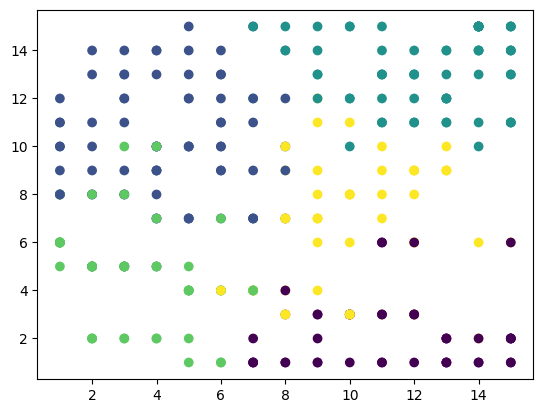

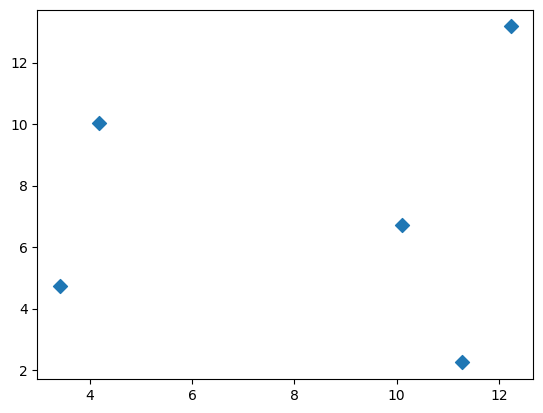

In [12]:
#Clustering RF
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
model = KMeans(n_clusters=5)
model.fit(rfm_use)

labels = model.predict(rfm_use)
print(labels)

#Visualize Cluster
xs= rfm_use[:,0]
ys= rfm_use[:,1]
plt.scatter(xs, ys, c=labels)
plt.show()

#Finding centroids cluster
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

[3 4 3 4 3 3 3 3 4 4 4 4 1 3 3 3 3 3 4 3 3 1 1 4 3 3 4 4 3 3 3 3 3 3 3 3 3
 3 4 3 3 1 4 4 1 4 4 3 3 3 3 3 3 1 4 1 3 3 4 3 1 1 1 3 4 1 3 3 1 1 4 3 1 4
 3 4 1 3 1 4 3 4 4 4 4 1 4 3 3 3 4 1 3 3 3 1 3 1 3 4 1 1 4 3 1 4 3 4 1 1 1
 3 1 1 1 3 4 1 4 1 1 1 4 1 4 4 1 1 1 3 3 3 3 0 2 4 4 3 3 0 2 1 2 1 4 1 1 3
 1 4 1 2 2 4 2 1 0 0 0 2 1 2 4 2 2 0 2 3 2 4 4 2 0 2 0 2 0 2 2 2 2 0 0 2 2
 0 0 0 1 2 0 2 2 0 2 2 0 2 0 0 2 2 0 2 0 2 2 0 2 0 2 0 2 2 0 0 2 2 2 0 0 0
 2 0 2 0 2 0 0 0 2 2 2 0 0 2 0 0 2 2 2 2 0 0 2 0 2 2 2 0 0 2 0 0 0 0 2 2 2
 0 2 2 0 0 0 0 0 0 2 0 2 2 2 2 0 0 2 2 2 0 0 0 0 0 0 2 0]


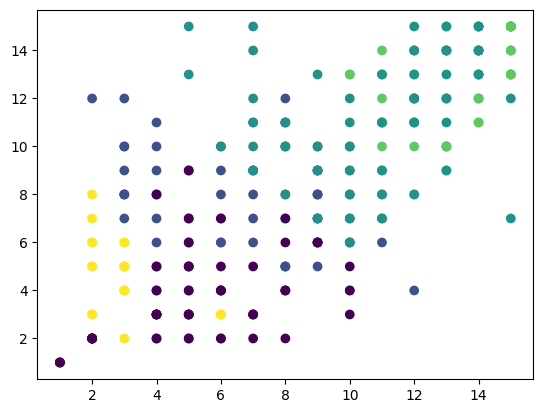

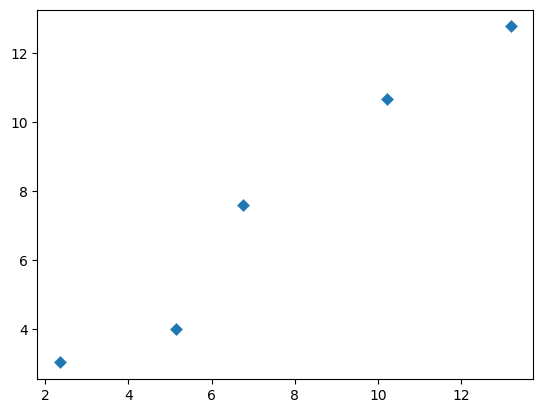

In [13]:
#Clustering RF
from sklearn.cluster import KMeans
import seaborn as sns
model = KMeans(n_clusters=5)
model.fit(rfm_use)

labels = model.predict(rfm_use)
print(labels)

#Visualize Cluster
xs= rfm_use[:,1]
ys= rfm_use[:,2]
plt.scatter(xs, ys, c=labels)
plt.show()

#Finding centroids cluster
centroids = model.cluster_centers_
centroids_x = centroids[:,1]
centroids_y = centroids[:,2]
sns.scatterplot(x=centroids_x, y=centroids_y,data=centroids, marker='D', s=50)
plt.show()

[16251.951219512193, 8973.03103792415, 6169.8178861863, 4770.392275877486, 4051.2720509683145, 3423.484803342298, 3046.105844445619, 2749.258400858401, 2490.1362325985106]


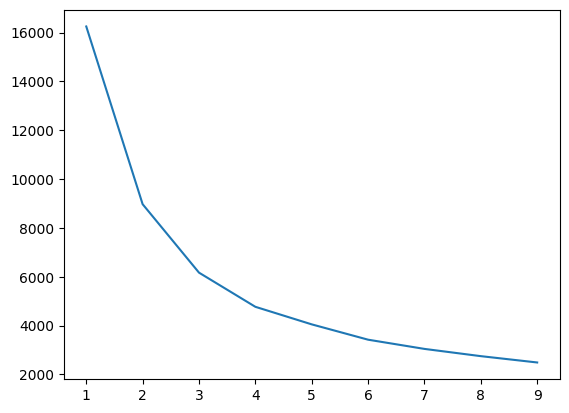

In [14]:
#Evaluating the Model
from sklearn.cluster import KMeans
inertia = []
n_data = range(1,10)

for n in n_data:
    model = KMeans(n_clusters=n)
    model.fit(rfm_use)
    inertia.append(model.inertia_)
    
print(inertia)

plt.plot(n_data, inertia)
plt.show()